In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [206]:
data = pd.read_excel('produccion_2017.xls', sheet_name='to_csv')

display(data.head())
data.info()

,anio,mes,dia,recibo,leche_alpura,leche_impro,leche_queso,becerras,leche_pers,extras_o,...,vacas_cks,vacas_tot,promedio_linea,promedio_hato,silo_maiz,kilos_alfalfa,kilos_avena,kilos_tritic,kilos_alfalfa_2,obervaciones
0,2017,Enero,1,697729,11815,12055,21,548,64,0,...,70,780,34.511268,31.414103,15336,5947,138.572368,1015,957.684932,NaN
1,2017,Enero,2,699457,13196,10726,200,548,64,0,...,65,780,34.593007,31.710256,15509,6394,138.572368,1148,957.684932,NaN
2,2017,Enero,3,699482,11796,11874,0,600,64,0,...,65,780,34.033566,31.197436,15509,6394,138.572368,1148,957.684932,NaN
3,2017,Enero,4,699507,11806,12116,336,600,64,0,...,63,780,34.758717,31.951282,15509,6394,138.572368,1148,957.684932,NaN
4,2017,Enero,5,699535,11796,12052,175,600,64,0,...,68,782,34.575630,31.569054,15509,6394,138.572368,1148,957.684932,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
anio               365 non-null int64
mes                365 non-null object
dia                365 non-null int64
recibo             365 non-null int64
leche_alpura       365 non-null int64
leche_impro        365 non-null int64
leche_queso        365 non-null int64
becerras           365 non-null int64
leche_pers         365 non-null int64
extras_o           365 non-null int64
extras_e           365 non-null int64
extras_c           364 non-null float64
leche_total        365 non-null int64
vacas_ord          365 non-null int64
vacas_cks          365 non-null int64
vacas_tot          365 non-null int64
promedio_linea     365 non-null float64
promedio_hato      365 non-null float64
silo_maiz          365 non-null int64
kilos_alfalfa      365 non-null int64
kilos_avena        365 non-null float64
kilos_tritic       365 non-null int64
kilos_alfalfa_2    365 non-null float64
obervacion

[Text(0.5,1,'Missing Values for Each Feature')]

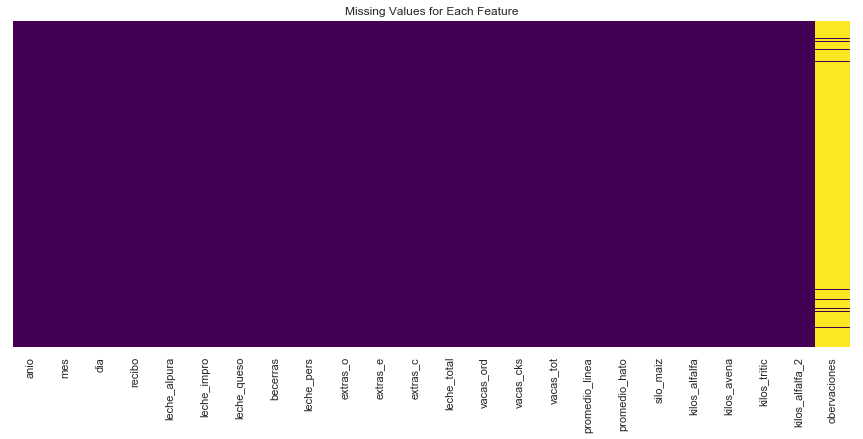

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set(title='Missing Values for Each Feature')

In [207]:
# Remplazar NaNs en alfalfa_2 por 0s y remover 'sob'
data['kilos_alfalfa_2'].fillna(0, inplace=True)
data['kilos_alfalfa_2'] = data['kilos_alfalfa_2'].apply(lambda x: int(x.lower().replace('sob', '')) if x != 0 else x)
data['kilos_alfalfa_2'][data['kilos_alfalfa_2'] == 0] = np.mean(data['kilos_alfalfa_2'])

# Remplazas Nans en kilos_avena
data['kilos_avena'].fillna(np.mean(data['kilos_avena'][data['kilos_avena'].isnull() == False]), inplace=True)

# Remplazas Nans en kilos_avena
data['extras_c'].fillna(np.mean(data['extras_c'][data['extras_c'].isnull() == False]), inplace=True)

Text(0.5,1,'Linea & Hato')

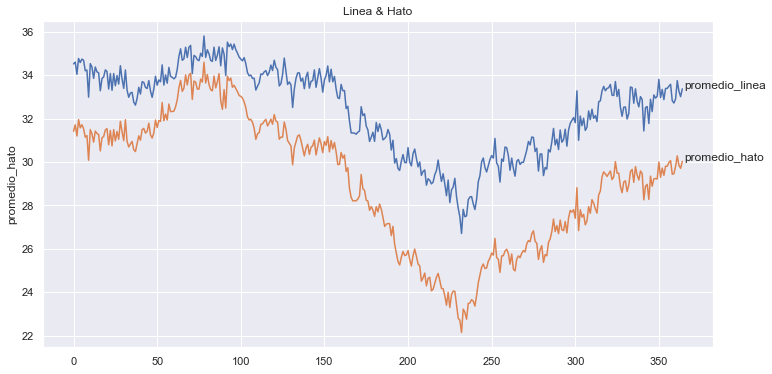

In [173]:
# Linea y Hato

fig, axes = plt.subplots(figsize=(12, 6))
sns.lineplot(x=data.index.values, y=data.promedio_linea, legend=None)
sns.lineplot(x=data.index.values, y=data.promedio_hato, ax=axes)
axes.text(len(data.promedio_linea), data.promedio_linea[-1:], 'promedio_linea')
axes.text(len(data.promedio_hato), data.promedio_hato[-1:], 'promedio_hato')
plt.title('Linea & Hato')

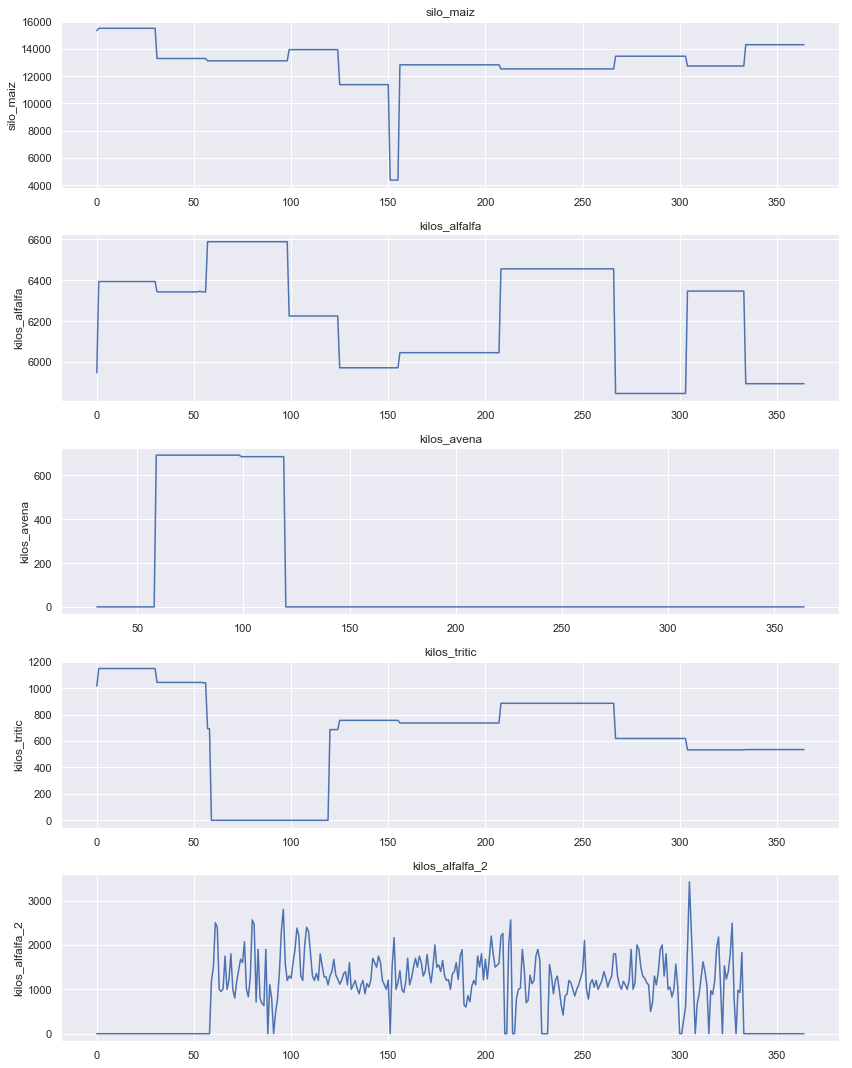

In [180]:
# Comida 

fig, axes = plt.subplots(5, 1, figsize=(12, 15))

comidas = ['silo_maiz', 'kilos_alfalfa', 'kilos_avena', 'kilos_tritic', 'kilos_alfalfa_2']

for i,food in enumerate(comidas):
    sns.lineplot(x=data.index.values, y=data[food], label=None, ax=axes[i])
    axes[i].set_title(food)
    
plt.tight_layout()

Text(0.5,1,'Recibo 2017')

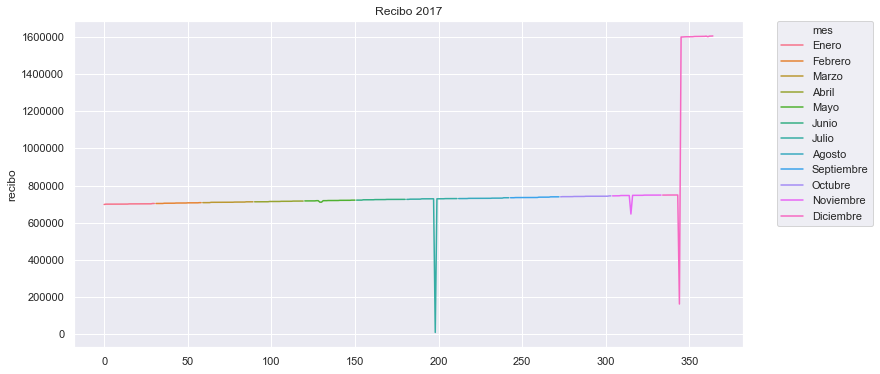

In [166]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index.values, y=data.recibo, hue=data.mes)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title('Recibo 2017')

Text(0.5,1,'Leche 2017')

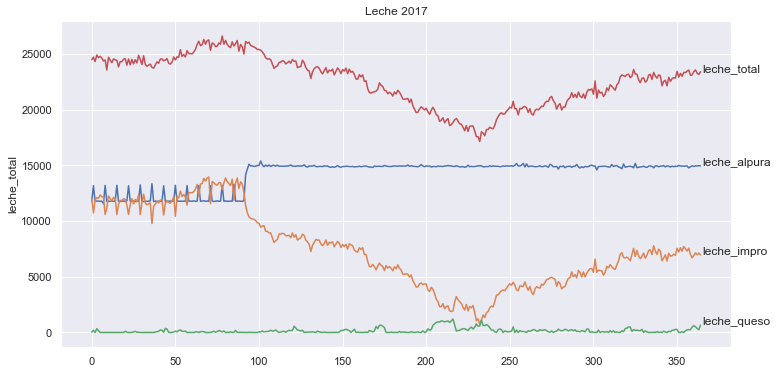

In [167]:
sns.set(style='darkgrid')
fig, axes = plt.subplots(figsize=(12, 6))

leches = ['leche_alpura', 'leche_impro', 'leche_queso', 'leche_total']  # leche_pers solo tiene un valor: '64'

for i in leches:
    sns.lineplot(x=data.index.values, y=data[i], label=None)
    axes.text(len(data[i]), data[i][-1:], i)
    
plt.title('Leche 2017')

Text(0,690,'Vacas Ord')

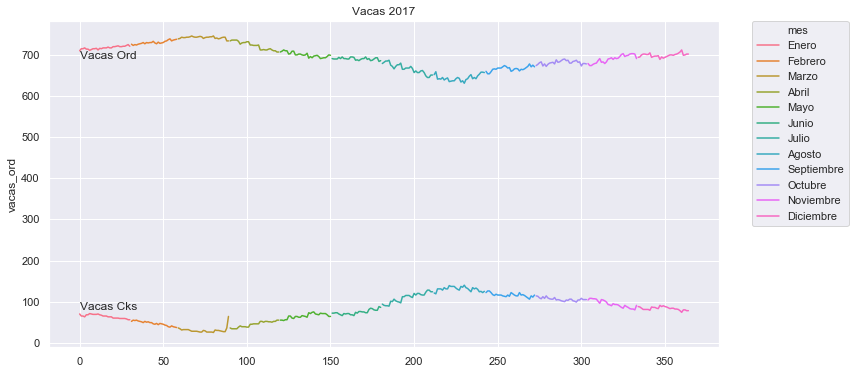

In [168]:
sns.set(style='darkgrid')
fig, axes = plt.subplots(figsize=(12, 6))
sns.lineplot(x=data.index.values, y=data.vacas_cks, hue=data.mes, ax=axes, legend=None)
sns.lineplot(x=data.index.values, y=data.vacas_ord, hue=data.mes, ax=axes)
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title('Vacas 2017')
axes.text(0, data.vacas_cks[0] + 10, 'Vacas Cks')
axes.text(0, data.vacas_ord[0] - 20, 'Vacas Ord')

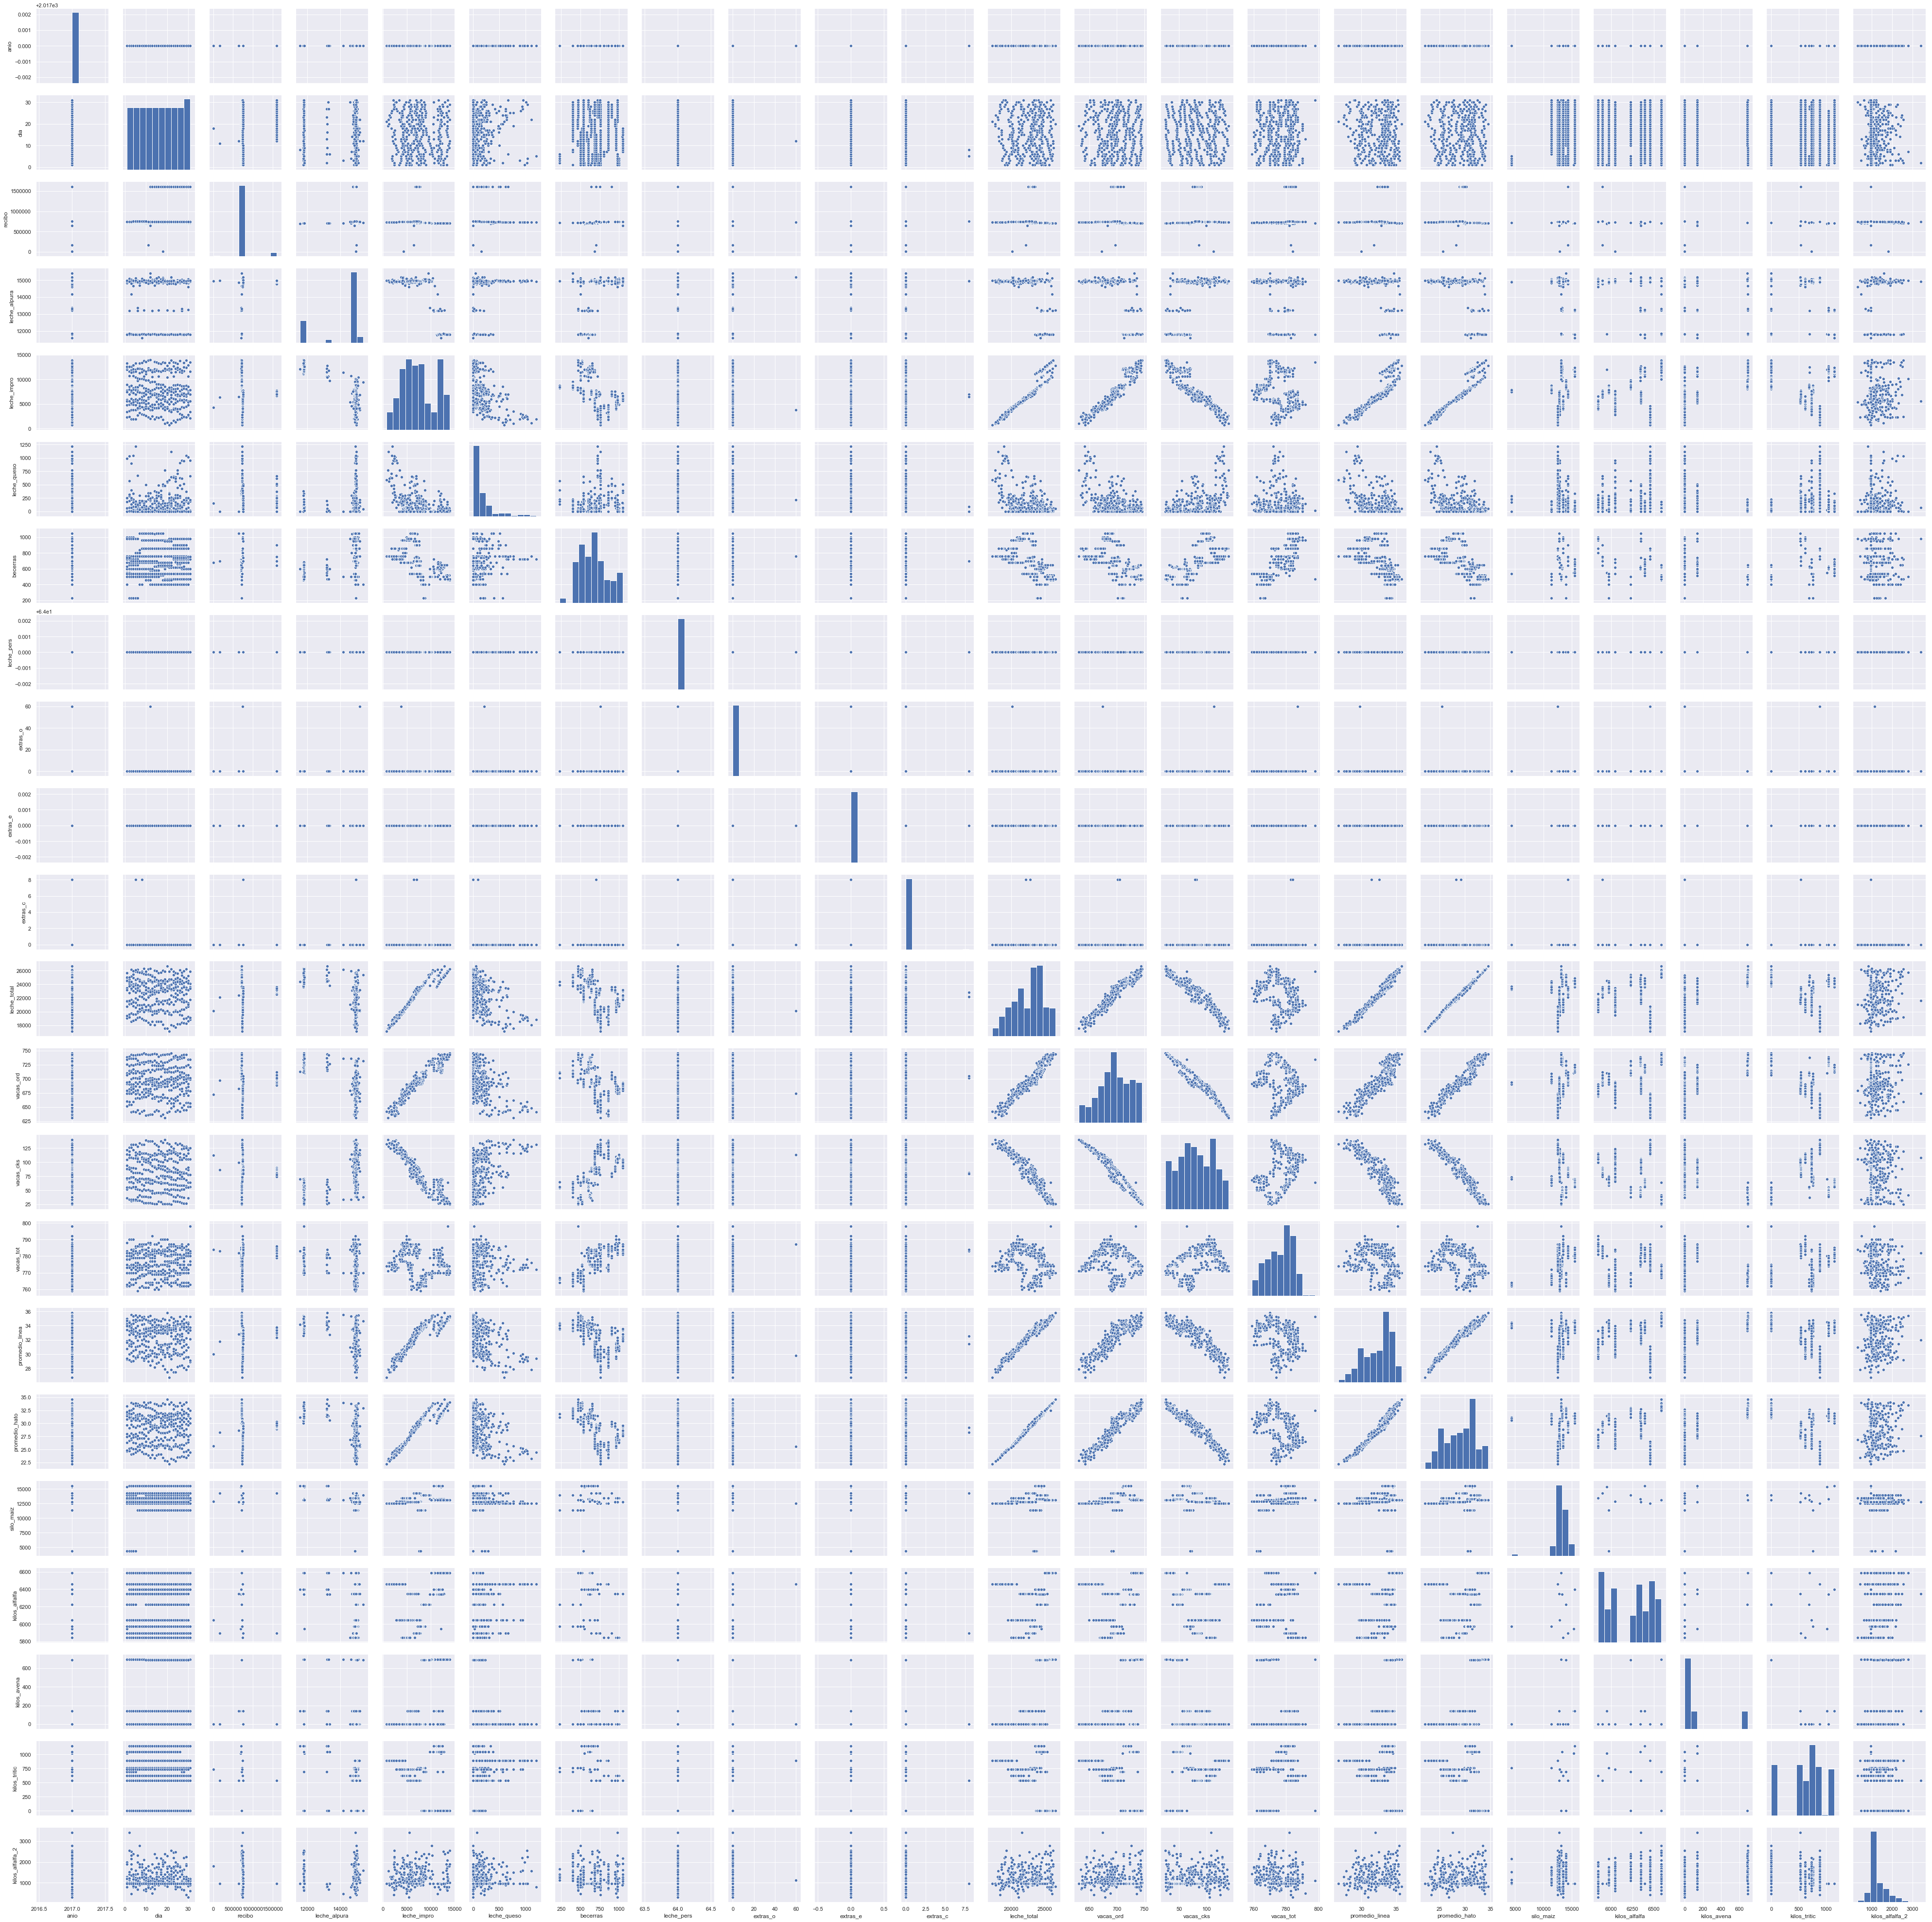

In [209]:
# Pair Plots
sns.pairplot(data)